In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
import keras
!pip install fast_ml
from fast_ml.model_development import train_valid_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
dataset = datasets.fetch_california_housing()
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:

x_train, y_train, x_valid, y_valid, x_test, y_test = train_valid_test_split(df, target = 'target', train_size=0.7, valid_size=0.15, test_size=0.15)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

## Model 1

In [4]:
# Regression MLP
model = Sequential()
model.add(tf.keras.layers.Dense(8,input_shape=(8,),activation='relu'))
model.add(tf.keras.layers.Dense(30,activation = 'relu'))
model.add(tf.keras.layers.Dense(1,activation = 'linear'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 30)                270       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 373
Trainable params: 373
Non-trainable params: 0
_________________________________________________________________


In [6]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

In [7]:
history = model.fit(x_train, y_train, epochs=20,validation_data=(x_valid, y_valid))

Epoch 1/20
452/452 [==============================] - 2s 3ms/step - loss: 1.5728 - mse: 1.5728 - val_loss: 0.6106 - val_mse: 0.6106
Epoch 2/20
452/452 [==============================] - 1s 3ms/step - loss: 0.5714 - mse: 0.5714 - val_loss: 0.4752 - val_mse: 0.4752
Epoch 3/20
452/452 [==============================] - 1s 3ms/step - loss: 0.4663 - mse: 0.4663 - val_loss: 0.4209 - val_mse: 0.4209
Epoch 4/20
452/452 [==============================] - 1s 3ms/step - loss: 0.4263 - mse: 0.4263 - val_loss: 0.4036 - val_mse: 0.4036
Epoch 5/20
452/452 [==============================] - 1s 3ms/step - loss: 0.4079 - mse: 0.4079 - val_loss: 0.3943 - val_mse: 0.3943
Epoch 6/20
452/452 [==============================] - 1s 3ms/step - loss: 0.3981 - mse: 0.3981 - val_loss: 0.3876 - val_mse: 0.3876
Epoch 7/20
452/452 [==============================] - 1s 3ms/step - loss: 0.3915 - mse: 0.3915 - val_loss: 0.3827 - val_mse: 0.3827
Epoch 8/20
452/452 [==============================] - 1s 3ms/step - loss: 0.

In [8]:
print(f''' Model Loss & MSE: ''', model.evaluate(x_test,y_test))

97/97 [==============================] - 0s 2ms/step - loss: 0.3137 - mse: 0.3137
 Model Loss & MSE:  [0.31368279457092285, 0.31368279457092285]


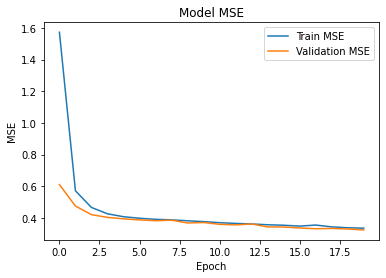

In [9]:
#plot for model mse
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train MSE', 'Validation MSE'])
plt.show()

## Model 2

In [10]:
# Deep and Wide neural network
input = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model2 = keras.models.Model(inputs=[input], outputs=[output])

In [11]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_4[0][0]']            

In [12]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model2.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

In [13]:
history2 = model2.fit(x_train, y_train, epochs=20,validation_data=(x_valid, y_valid))

Epoch 1/20
452/452 [==============================] - 2s 3ms/step - loss: 1.0342 - mse: 1.0342 - val_loss: 0.5617 - val_mse: 0.5617
Epoch 2/20
452/452 [==============================] - 1s 3ms/step - loss: 0.4830 - mse: 0.4830 - val_loss: 0.4145 - val_mse: 0.4145
Epoch 3/20
452/452 [==============================] - 1s 3ms/step - loss: 0.4315 - mse: 0.4315 - val_loss: 0.4167 - val_mse: 0.4167
Epoch 4/20
452/452 [==============================] - 1s 3ms/step - loss: 0.3896 - mse: 0.3896 - val_loss: 0.3725 - val_mse: 0.3725
Epoch 5/20
452/452 [==============================] - 1s 3ms/step - loss: 0.3757 - mse: 0.3757 - val_loss: 0.3545 - val_mse: 0.3545
Epoch 6/20
452/452 [==============================] - 1s 3ms/step - loss: 0.3579 - mse: 0.3579 - val_loss: 0.3415 - val_mse: 0.3415
Epoch 7/20
452/452 [==============================] - 1s 3ms/step - loss: 0.3645 - mse: 0.3645 - val_loss: 0.3423 - val_mse: 0.3423
Epoch 8/20
452/452 [==============================] - 1s 3ms/step - loss: 0.

In [14]:
print(f''' Model Loss & MSE: ''' ,model2.evaluate(x_test,y_test))

97/97 [==============================] - 0s 2ms/step - loss: 0.2801 - mse: 0.2801
 Model Loss & MSE:  [0.2801394462585449, 0.2801394462585449]


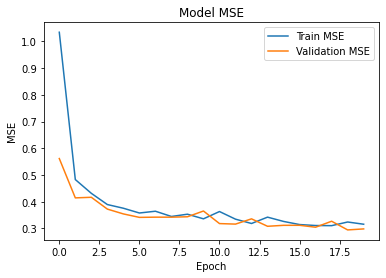

In [15]:
#Plot for Model MSE
plt.plot(history2.history['mse'])
plt.plot(history2.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train MSE', 'Validation MSE'])
plt.show()

## Model 3

In [16]:
# Deep and Wide neural network with features splitted and sent into both 
input_A = keras.layers.Input(shape=[5]) # First 5 features(0-4) into deep layer
input_B = keras.layers.Input(shape=[6]) # 6 features(2-7) into wide layer
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model3 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [17]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model3.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

In [18]:
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

history3 = model3.fit((x_train_A, x_train_B), y_train, epochs=20,validation_data=((x_valid_A, x_valid_B), y_valid))

Epoch 1/20
452/452 [==============================] - 2s 3ms/step - loss: 1.1971 - mse: 1.1971 - val_loss: 0.5327 - val_mse: 0.5327
Epoch 2/20
452/452 [==============================] - 1s 3ms/step - loss: 0.4730 - mse: 0.4730 - val_loss: 0.4234 - val_mse: 0.4234
Epoch 3/20
452/452 [==============================] - 1s 3ms/step - loss: 0.4174 - mse: 0.4174 - val_loss: 0.4003 - val_mse: 0.4003
Epoch 4/20
452/452 [==============================] - 1s 3ms/step - loss: 0.3975 - mse: 0.3975 - val_loss: 0.4144 - val_mse: 0.4144
Epoch 5/20
452/452 [==============================] - 1s 3ms/step - loss: 0.3888 - mse: 0.3888 - val_loss: 0.3943 - val_mse: 0.3943
Epoch 6/20
452/452 [==============================] - 1s 3ms/step - loss: 0.3818 - mse: 0.3818 - val_loss: 0.4063 - val_mse: 0.4063
Epoch 7/20
452/452 [==============================] - 1s 3ms/step - loss: 0.3859 - mse: 0.3859 - val_loss: 0.3599 - val_mse: 0.3599
Epoch 8/20
452/452 [==============================] - 1s 3ms/step - loss: 0.

In [19]:
print(f''' Model Loss & MSE: ''' ,model3.evaluate((x_test_A, x_test_B), y_test))

97/97 [==============================] - 0s 2ms/step - loss: 0.3142 - mse: 0.3142
 Model Loss & MSE:  [0.3142314851284027, 0.3142314851284027]


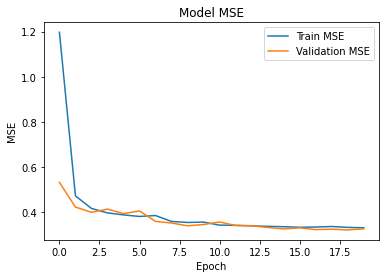

In [20]:
#plot for model mse
plt.plot(history3.history['mse'])
plt.plot(history3.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train MSE', 'Validation MSE'])
plt.show()

## MSE in Model 1: 0.31368279457092285

## MSE in Model 2: 0.2801394462585449

## MSE in Model 3: 0.3142314851284027

## As we can see from the MSE values that there is not much difference between Regression MLP Model and Wide and Deep Neural Network Model made by splitting features and sending some of them in Deep network while some in Wide network.